Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Skipping incomplete record: {'id': 16395, 'img': 'img/16395.png', 'text': 'handjobs sold seperately'}
Skipping incomplete record: {'id': 37405, 'img': 'img/37405.png', 'text': 'introducing fidget spinner for women'}
Skipping incomplete record: {'id': 94180, 'img': 'img/94180.png', 'text': "happy pride month let's go beat up lesbians"}
Skipping incomplete record: {'id': 54321, 'img': 'img/54321.png', 'text': 'laughs in [majority of u.s crime rate]'}
Skipping incomplete record: {'id': 97015, 'img': 'img/97015.png', 'text': 'finds out those 72 virgins.. are goats'}
Skipping incomplete record: {'id': 73506, 'img': 'img/73506.png', 'text': 'look your dad fucked goats.. i capped him...sorry..'}
Skipping incomplete record: {'id': 5429, 'img': 'img/05429.png', 'text': 'claims that her ancestors created a safe space for jews these are her ancestors'}
Skipping incomplete record: {'id': 70691, 'img': 'img/70691.png', 'text': 'overdose'}
Skipping incomplete record: {'id': 69421, 'img': 'img/69421.

Evaluating: 100%|██████████| 225/225 [00:22<00:00,  9.95it/s]


Train Loss: 0.6582 | Val Loss: 0.6599 | Val Acc: 0.6272 | Val F1: 0.4835

Epoch 2/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.87it/s]


Train Loss: 0.6561 | Val Loss: 0.6618 | Val Acc: 0.6272 | Val F1: 0.4835

Epoch 3/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.80it/s]


Train Loss: 0.6567 | Val Loss: 0.6603 | Val Acc: 0.6272 | Val F1: 0.4835

Epoch 4/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.76it/s]


Train Loss: 0.6559 | Val Loss: 0.6609 | Val Acc: 0.6272 | Val F1: 0.4835

Epoch 5/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.78it/s]


Train Loss: 0.6541 | Val Loss: 0.6571 | Val Acc: 0.6272 | Val F1: 0.4835

Epoch 6/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.80it/s]


Train Loss: 0.6527 | Val Loss: 0.6552 | Val Acc: 0.6294 | Val F1: 0.4935

Epoch 7/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.79it/s]


Train Loss: 0.6457 | Val Loss: 0.6519 | Val Acc: 0.6344 | Val F1: 0.5536

Epoch 8/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.73it/s]


Train Loss: 0.6332 | Val Loss: 0.6571 | Val Acc: 0.6311 | Val F1: 0.5254

Epoch 9/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.82it/s]


Train Loss: 0.6082 | Val Loss: 0.6693 | Val Acc: 0.6100 | Val F1: 0.5690

Epoch 10/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.78it/s]


Train Loss: 0.5878 | Val Loss: 0.6764 | Val Acc: 0.6089 | Val F1: 0.5681

Epoch 11/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.78it/s]


Train Loss: 0.5700 | Val Loss: 0.6804 | Val Acc: 0.6106 | Val F1: 0.5670

Epoch 12/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.74it/s]


Train Loss: 0.5601 | Val Loss: 0.6806 | Val Acc: 0.6111 | Val F1: 0.5657

Epoch 13/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.77it/s]


Train Loss: 0.5513 | Val Loss: 0.6823 | Val Acc: 0.6078 | Val F1: 0.5629

Epoch 14/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.76it/s]


Train Loss: 0.5470 | Val Loss: 0.6863 | Val Acc: 0.6078 | Val F1: 0.5641

Epoch 15/15


Evaluating: 100%|██████████| 225/225 [00:25<00:00,  8.71it/s]


Train Loss: 0.5435 | Val Loss: 0.6852 | Val Acc: 0.6083 | Val F1: 0.5624

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.85      0.73      1129
           1       0.44      0.20      0.28       671

    accuracy                           0.61      1800
   macro avg       0.54      0.53      0.50      1800
weighted avg       0.57      0.61      0.56      1800



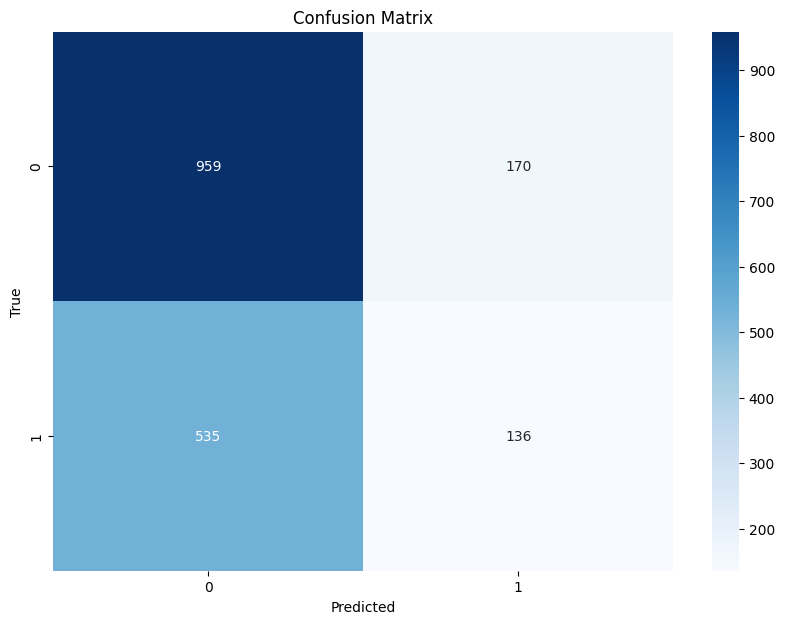

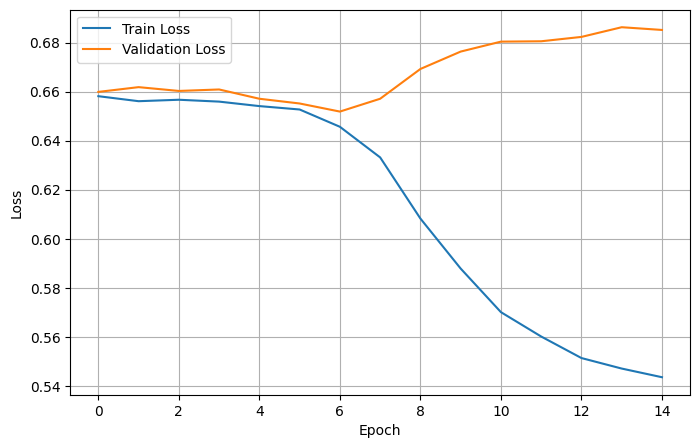

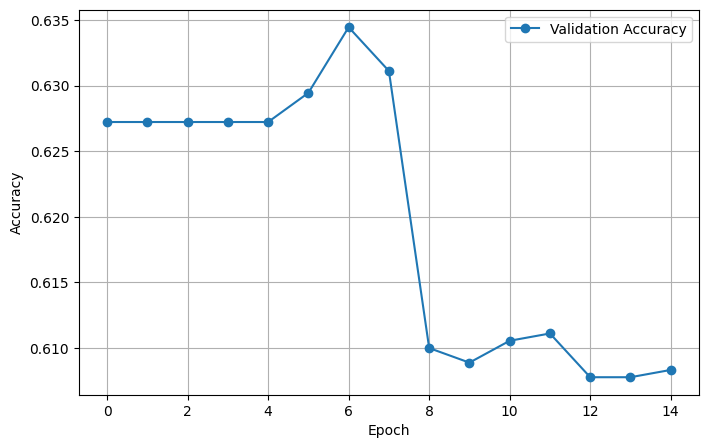

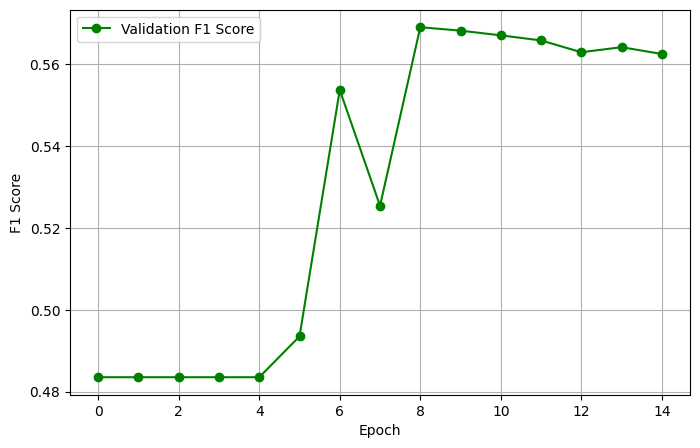

In [1]:
# ====================== Imports ======================
import os
import json
import torch
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from transformers import CLIPProcessor, CLIPModel
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# ====================== CONFIG ======================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMG_DIR = "data/img"
JSONL_PATH = "data/dataset.jsonl"
NUM_LABELS = 2
LABEL_MAP = {0: 'non-hateful', 1: 'hateful'}
INV_LABEL_MAP = {v: k for k, v in LABEL_MAP.items()}
BATCH_SIZE = 8
EPOCHS = 15

# ====================== Load JSONL with validation ======================
records = []
with open(JSONL_PATH, "r", encoding="utf-8") as f:
    for line in f:
        try:
            data = json.loads(line.strip())
            if all(k in data for k in ['label', 'text', 'img']):
                records.append(data)
            else:
                print(f"Skipping incomplete record: {data}")
        except json.JSONDecodeError:
            print(f"Skipping bad JSON: {line.strip()}")

# ====================== Dataset ======================
class MemeDataset(Dataset):
    def __init__(self, records, processor, img_dir):
        self.data = records
        self.processor = processor
        self.img_dir = img_dir

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data[idx]
        image_path = os.path.join(self.img_dir, os.path.basename(row['img']))

        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image not found: {image_path}")

        image = Image.open(image_path).convert("RGB")
        text = str(row['text'])
        label = row['label']

        inputs = self.processor(images=image, text=text, return_tensors="pt", padding=True, truncation=True)
        inputs = {k: v.squeeze(0) for k, v in inputs.items()}
        inputs["labels"] = torch.tensor(label)

        return inputs

# ====================== Model ======================
class BLIPClassificationHead(nn.Module):
    def __init__(self, num_labels):
        super().__init__()
        self.blip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(512, num_labels)
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, input_ids, attention_mask, pixel_values, labels=None):
        outputs = self.blip(
            input_ids=input_ids,
            attention_mask=attention_mask,
            pixel_values=pixel_values,
            return_dict=True
        )
        pooled_output = self.dropout(outputs.image_embeds)
        logits = self.classifier(pooled_output)

        loss = self.loss_fn(logits, labels) if labels is not None else None
        return {"loss": loss, "logits": logits}

# ====================== Train & Eval ======================
def train(model, dataloader, optimizer):
    model.train()
    total_loss = 0
    for batch in tqdm(dataloader, desc="Training"):
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        labels = batch['labels'].to(device)
        outputs = model(**inputs, labels=labels)

        loss = outputs["loss"]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def evaluate(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []
    total_loss = 0
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs, labels=labels)
            logits = outputs["logits"]
            loss = outputs["loss"]
            preds = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            total_loss += loss.item()
    avg_loss = total_loss / len(dataloader)
    acc = accuracy_score(all_labels, all_preds)
    return acc, avg_loss, all_preds, all_labels

def custom_collate(batch):
    keys = batch[0].keys()
    collated = {}
    for key in keys:
        if key == "labels":
            collated[key] = torch.tensor([item[key] for item in batch])
        else:
            collated[key] = torch.nn.utils.rnn.pad_sequence(
                [item[key] for item in batch],
                batch_first=True,
                padding_value=0
            )
    return collated

# ====================== Run ======================
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
dataset = MemeDataset(records, processor, IMG_DIR)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=custom_collate)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=custom_collate)

model = BLIPClassificationHead(num_labels=NUM_LABELS).to(device)
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ====================== Training Loop ======================
train_losses, val_losses = [], []
val_accuracies, val_f1s = [], []
final_preds, final_labels = [], []
best_val_loss = float('inf')

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    train_loss = train(model, train_loader, optimizer)
    train_losses.append(train_loss)

    val_acc, val_loss, preds, labels = evaluate(model, val_loader)
    val_losses.append(val_loss)

    f1 = f1_score(labels, preds, average='weighted')
    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Val F1: {f1:.4f}")

    val_accuracies.append(val_acc)
    val_f1s.append(f1)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pt")

    scheduler.step()
    final_preds = preds
    final_labels = labels

# ====================== Final Eval & Plots ======================
print("\nClassification Report:")
print(classification_report(final_labels, final_preds, target_names=[str(k) for k in LABEL_MAP.keys()]))

os.makedirs("plots", exist_ok=True)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(final_labels, final_preds), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("plots/confusion_matrix.png")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig("plots/loss_plot.png")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(val_accuracies, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.savefig("plots/accuracy_plot.png")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(val_f1s, label="Validation F1 Score", marker="o", color="green")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()
plt.grid()
plt.savefig("plots/f1_score_plot.png")
plt.show()
